
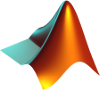
# **MatrixLaboratory $\Rightarrow$ Matlab**
is an interpreted programming language. Originally developed for linear algebra and engineering problems, but now with wide applicability and toolboxes for areas ranging from medicine, economics, and machine learning.

A good way to introduce yourself to a new language is by trying to solve a "non-trivial" problem; learning the tools and syntax necessary to solve the problem along the way. This motivates the syntax/tools in a "why" versus "what" way!

help@scc.bu.edu

jbevan@bu.edu

bgregor@bu.edu

In [ ]:
format compact

# Motivation: An Exploration of an Interesting Dataset


<img src="life.PNG" width="800">


**Github repository of data we will use**

https://github.com/bu-rcs/bu-rcs.github.io/tree/main/Bootcamp/Data

**Citation**

University of Wisconsin Population Health Institute. County Health Rankings & Roadmaps 2019.www.countyhealthrankings.org.

**Data Source**

https://www.countyhealthrankings.org/explore-health-rankings/rankings-data-documentation

# The readtable() solution

In [205]:
T = readtable("NE_HealthData.csv");

Set 'PreserveVariableNames' to true to use the original column headers as table variable names.


In [206]:
states=unique(T.State)

states =
  6x1 cell array
    {'Connecticut'  }
    {'Maine'        }
    {'Massachusetts'}
    {'New Hampshire'}
    {'Rhode Island' }
    {'Vermont'      }


How do we find a particular state in the table?

In [207]:
state_inds=cellfun(@(c)strcmp(c,T.State),states,'UniformOutput',false)

state_inds =
  6x1 cell array
    {73x1 logical}
    {73x1 logical}
    {73x1 logical}
    {73x1 logical}
    {73x1 logical}
    {73x1 logical}


In [208]:
mymap = containers.Map(states,state_inds)

mymap = 
  Map with properties:
        Count: 6
      KeyType: char
    ValueType: any


In [210]:
T(mymap("Connecticut"),{'FIPS','County','x_Smokers'})

ans =
  9x3 table
    FIPS        County        x_Smokers
    ____    ______________    _________
    9000    {'NA'        }     12.731  
    9001    {'Fairfield' }     10.158  
    9003    {'Hartford'  }     11.356  
    9005    {'Litchfield'}     12.063  
    9007    {'Middlesex' }     11.316  
    9009    {'New Haven' }     12.844  
    9011    {'New London'}     12.351  
    9013    {'Tolland'   }     10.543  
    9015    {'Windham'   }     14.357  


x_FairOrPoorHealth    x_Smokers    x_AdultsWithObesity    x_PhysicallyInactive    x_WithAccessToExerciseOpportunities    x_ExcessiveDrinking    x_SomeCollege    x_ChildrenInPoverty    x_SevereHousingProblems    x_DriveAloneToWork    x_LongCommute_DrivesAlone

In [213]:
table2array(T(mymap("Connecticut"),[4:9,11:15]))

ans =
  Columns 1 through 7
   13.8007   12.7310   25.8000   20.4000   94.0193   17.1107   68.9046
   10.5960   10.1579   21.3000   17.7000   96.8107   19.4012   70.8720
   13.0442   11.3562   26.2000   21.6000   96.8413   15.6600   69.4777
   10.6788   12.0631   27.7000   20.8000   82.9303   17.6350   68.0707
   10.3772   11.3164   25.5000   19.4000   96.7605   19.0825   76.1867
   14.4427   12.8440   28.1000   21.7000   95.4137   18.5541   65.8374
   11.5463   12.3508   29.6000   20.9000   92.0709   17.8461   66.4853
   10.4704   10.5435   24.9000   19.1000   76.6057   19.0502   75.3778
   13.3852   14.3570   30.3000   23.0000   81.8590   17.2326   62.0015
  Columns 8 through 11
   13.8000   18.1418   78.1694   33.7000
   12.7000   21.3150   72.2750   35.4000
   15.5000   16.8431   81.1092   29.4000
    8.1000   14.6960   83.8701   39.8000
    8.1000   14.0224   81.6107   40.5000
   16.7000   20.1326   78.1173   33.0000
   12.5000   15.0184   79.7801   28.6000
    6.4000   12.6065   

In [214]:
averages = zeros(numel(states),11);
it = 1;
for state = states
    averages(it,:) = mean(table2array(T(mymap(state),[4:9,11:15])))
    it = it + 1;
end

Error using containers.Map/subsref
Specified key type does not match the type expected for this container.


In [221]:
T.County(T.x_ChildrenInPoverty>10)

ans =
  56x1 cell array
    {'NA'          }
    {'Fairfield'   }
    {'Hartford'    }
    {'New Haven'   }
    {'New London'  }
    {'Windham'     }
    {'NA'          }
    {'Androscoggin'}
    {'Aroostook'   }
    {'Franklin'    }
    {'Hancock'     }
    {'Kennebec'    }
    {'Knox'        }
    {'Lincoln'     }
    {'Oxford'      }
    {'Penobscot'   }
    {'Piscataquis' }
    {'Sagadahoc'   }
    {'Somerset'    }
    {'Waldo'       }
    {'Washington'  }
    {'York'        }
    {'NA'          }
    {'Berkshire'   }
    {'Bristol'     }
    {'Dukes'       }
    {'Essex'       }
    {'Franklin'    }
    {'Hampden'     }
    {'Suffolk'     }
    {'Worcester'   }
    {'NA'          }
    {'Belknap'     }
    {'Carroll'     }
    {'Cheshire'    }
    {'Coos'        }
    {'Grafton'     }
    {'Strafford'   }
    {'Sullivan'    }
    {'NA'          }
    {'Kent'        }
    {'Newport'     }
    {'Providence'  }
    {'NA'          }
    {'Bennington'  }
    {'Caledonia'   }
    {'Esse

https://www.mathworks.com/matlabcentral/answers/64559-how-do-i-extract-a-vector-of-results-from-a-map

# Plotting and Visualization

Things to explore:  
-Correlation plots  
-Crude geographic plots  
-Unrelated data to show time series example  

**Correlation Plots**

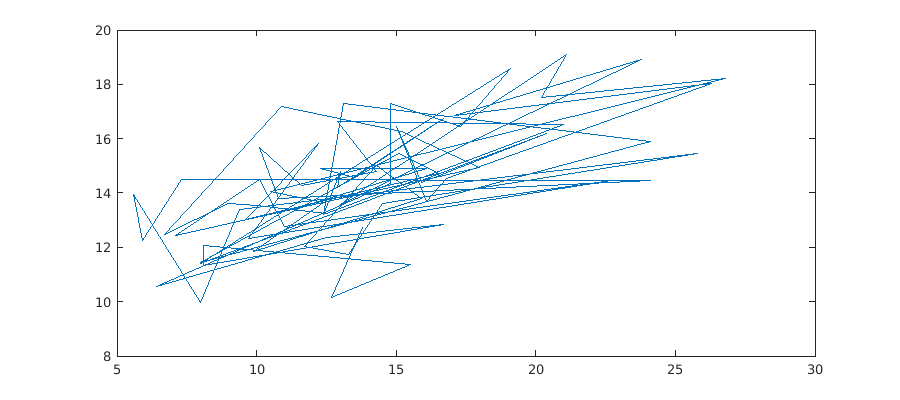

In [222]:
plot(T.x_ChildrenInPoverty, T.x_Smokers)

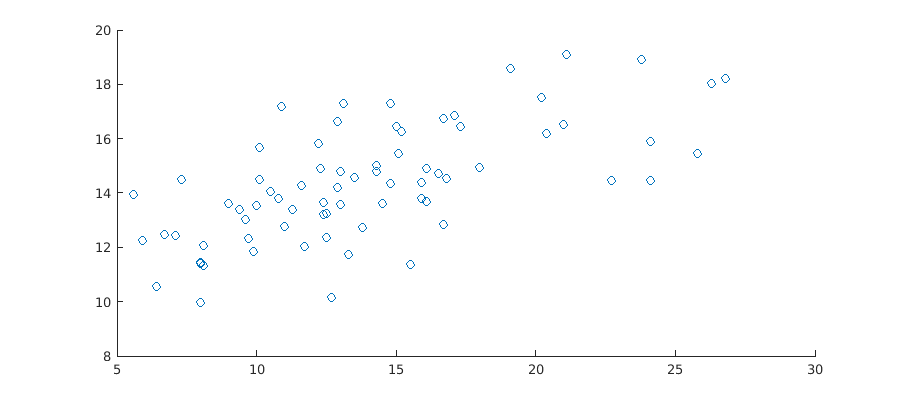

In [225]:
%plot inline
scatter(T.x_ChildrenInPoverty, T.x_Smokers)

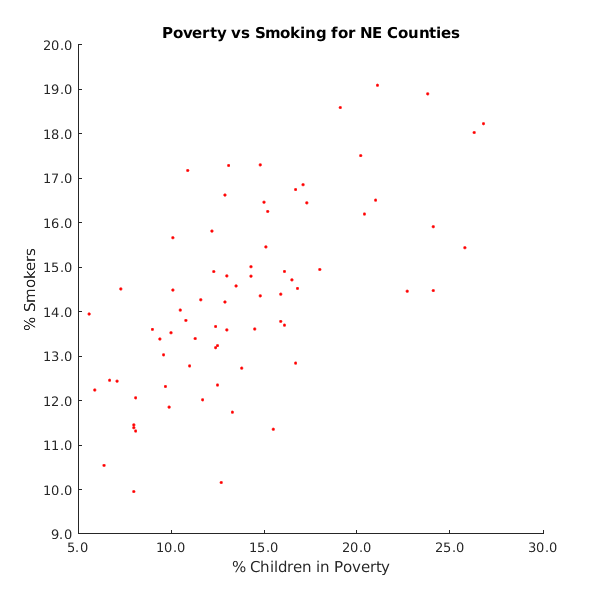

In [256]:
%plot inline -s 600,600
myscatter = scatter(T.x_ChildrenInPoverty, T.x_Smokers,'.r');
title("Poverty vs Smoking for NE Counties")
xlabel("% Children in Poverty")
ylabel("% Smokers")
ax = ancestor(h,'axes');
ax.YAxis.Exponent=0;
ytickformat('%2.1f')
xtickformat('%2.1f')
axis([5,30,9,20])

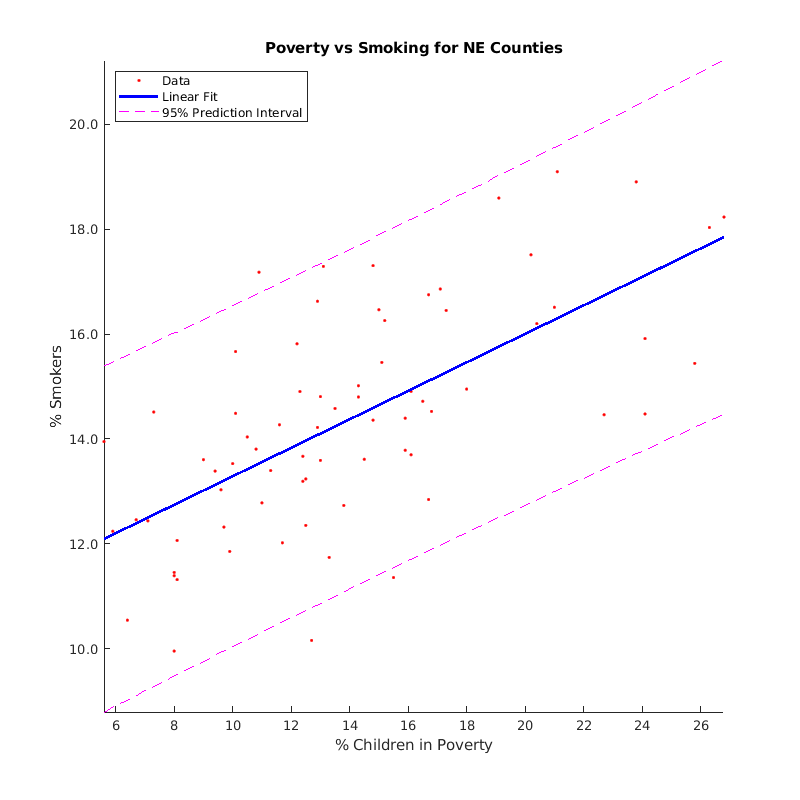

In [275]:
%plot inline -s 800,800
scatter(T.x_ChildrenInPoverty, T.x_Smokers,'.r')
title("Poverty vs Smoking for NE Counties")
xlabel('% Children in Poverty')
ylabel('% Smokers')
ax = ancestor(h,'axes');
ax.YAxis.Exponent=0;
ytickformat('%2.1f')
axis tight
hold on

%Plot linear regression and 95% confidence interval
[coeff, S] = polyfit(T.x_ChildrenInPoverty, T.x_Smokers,1);
xFit = linspace(min(T.x_ChildrenInPoverty), max(T.x_ChildrenInPoverty), 100);
[yFit, delta] = polyval(coeff, xFit, S);
plot(xFit, yFit, 'b-', 'LineWidth', 2);
plot(xFit,yFit+2*delta,'m--',xFit,yFit-2*delta,'m--')
legend('Data','Linear Fit','95% Prediction Interval','Location','northwest')

**Crude Geographic Plots**

*Census Data Source*:  
https://www.census.gov/geographies/reference-files/time-series/geo/gazetteer-files.html

*Direct link:*  
https://www2.census.gov/geo/docs/maps-data/data/gazetteer/2019_Gazetteer/2019_Gaz_counties_national.zip

In [276]:
C=readtable('counties.txt');

In [289]:
T(mymap("Connecticut"),{'FIPS','County'})

ans =
  9x2 table
    FIPS        County    
    ____    ______________
    9000    {'NA'        }
    9001    {'Fairfield' }
    9003    {'Hartford'  }
    9005    {'Litchfield'}
    9007    {'Middlesex' }
    9009    {'New Haven' }
    9011    {'New London'}
    9013    {'Tolland'   }
    9015    {'Windham'   }


In [286]:
C(310:320,1:4)

ans =
  11x4 table
     USPS     GEOID     ANSICODE               NAME          
    ______    _____    __________    ________________________
    {'CT'}     9003    2.1234e+05    {'Hartford County'     }
    {'CT'}     9005     2.128e+05    {'Litchfield County'   }
    {'CT'}     9007     2.128e+05    {'Middlesex County'    }
    {'CT'}     9009     2.128e+05    {'New Haven County'    }
    {'CT'}     9011     2.128e+05    {'New London County'   }
    {'CT'}     9013    2.1267e+05    {'Tolland County'      }
    {'CT'}     9015     2.128e+05    {'Windham County'      }
    {'DE'}    10001    2.1727e+05    {'Kent County'         }
    {'DE'}    10003    2.1727e+05    {'New Castle County'   }
    {'DE'}    10005    2.1727e+05    {'Sussex County'       }
    {'DC'}    11001    1.7024e+06    {'District of Columbia'}


In [ ]:
lat = C.INTPTLAT;
long = C.INTPTLONG;

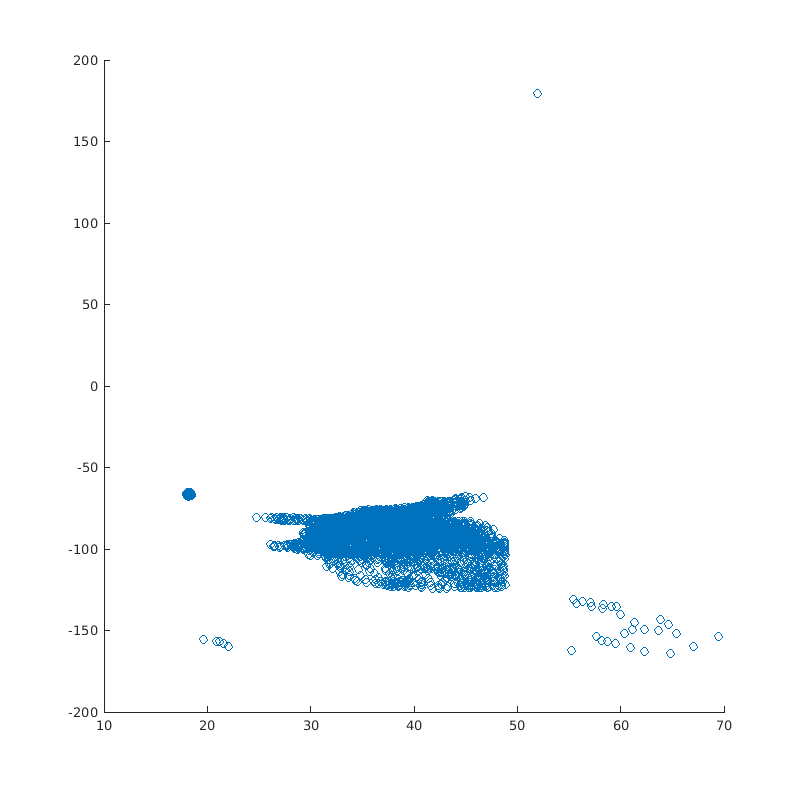

In [290]:
scatter(lat,long)

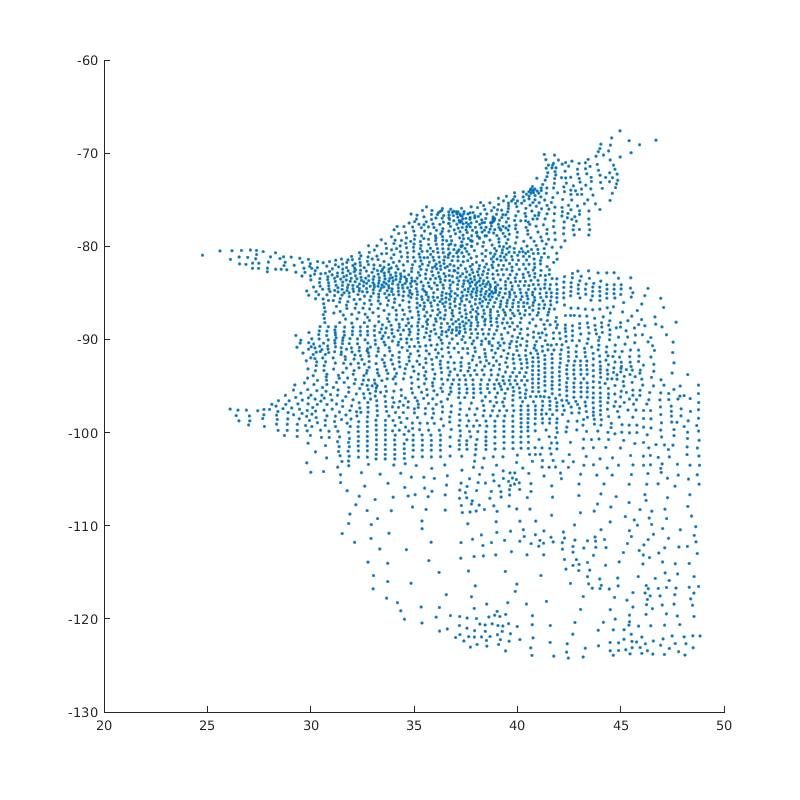

In [291]:
contiguous = long>-125 & long<-50 & lat>24;
scatter(lat(contiguous),long(contiguous),'.')

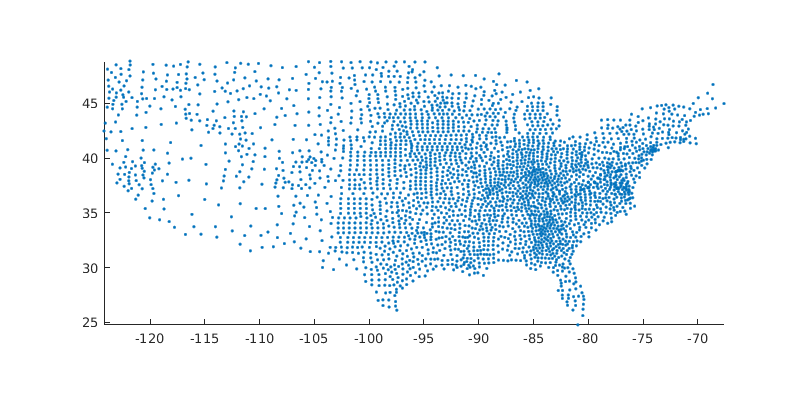

In [323]:
%plot -s 800,400
contig = long>-125 & long<-50 & lat>24;
clong = long(contig);
clat = lat(contig);
scatter(clong,clat,'.')
axis tight equal

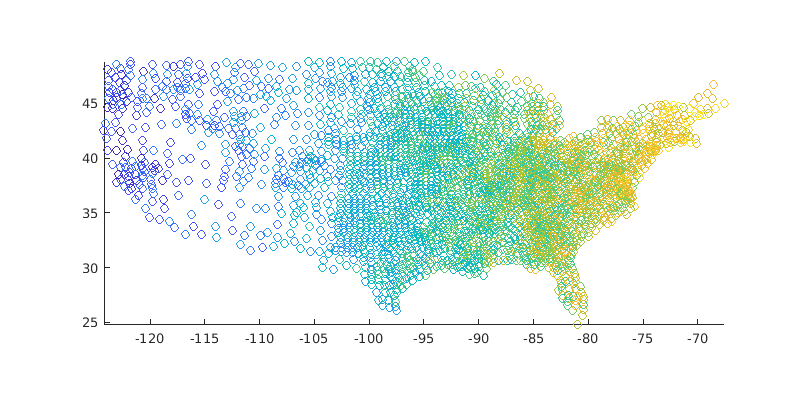

In [322]:
%plot -s 800,400
contig = long>-125 & long<-50 & lat>24;
clong = long(contig);
clat = lat(contig);
scatter(clong,clat,[],rand(numel(clong),1)*20+clong)
axis tight equal

In [304]:
rand(numel(clong),1);

ans = 
  Group with properties:

    Children: [2x1 Line]
     Visible: 'on'
     HitTest: 'on'

  Use GET to show all properties


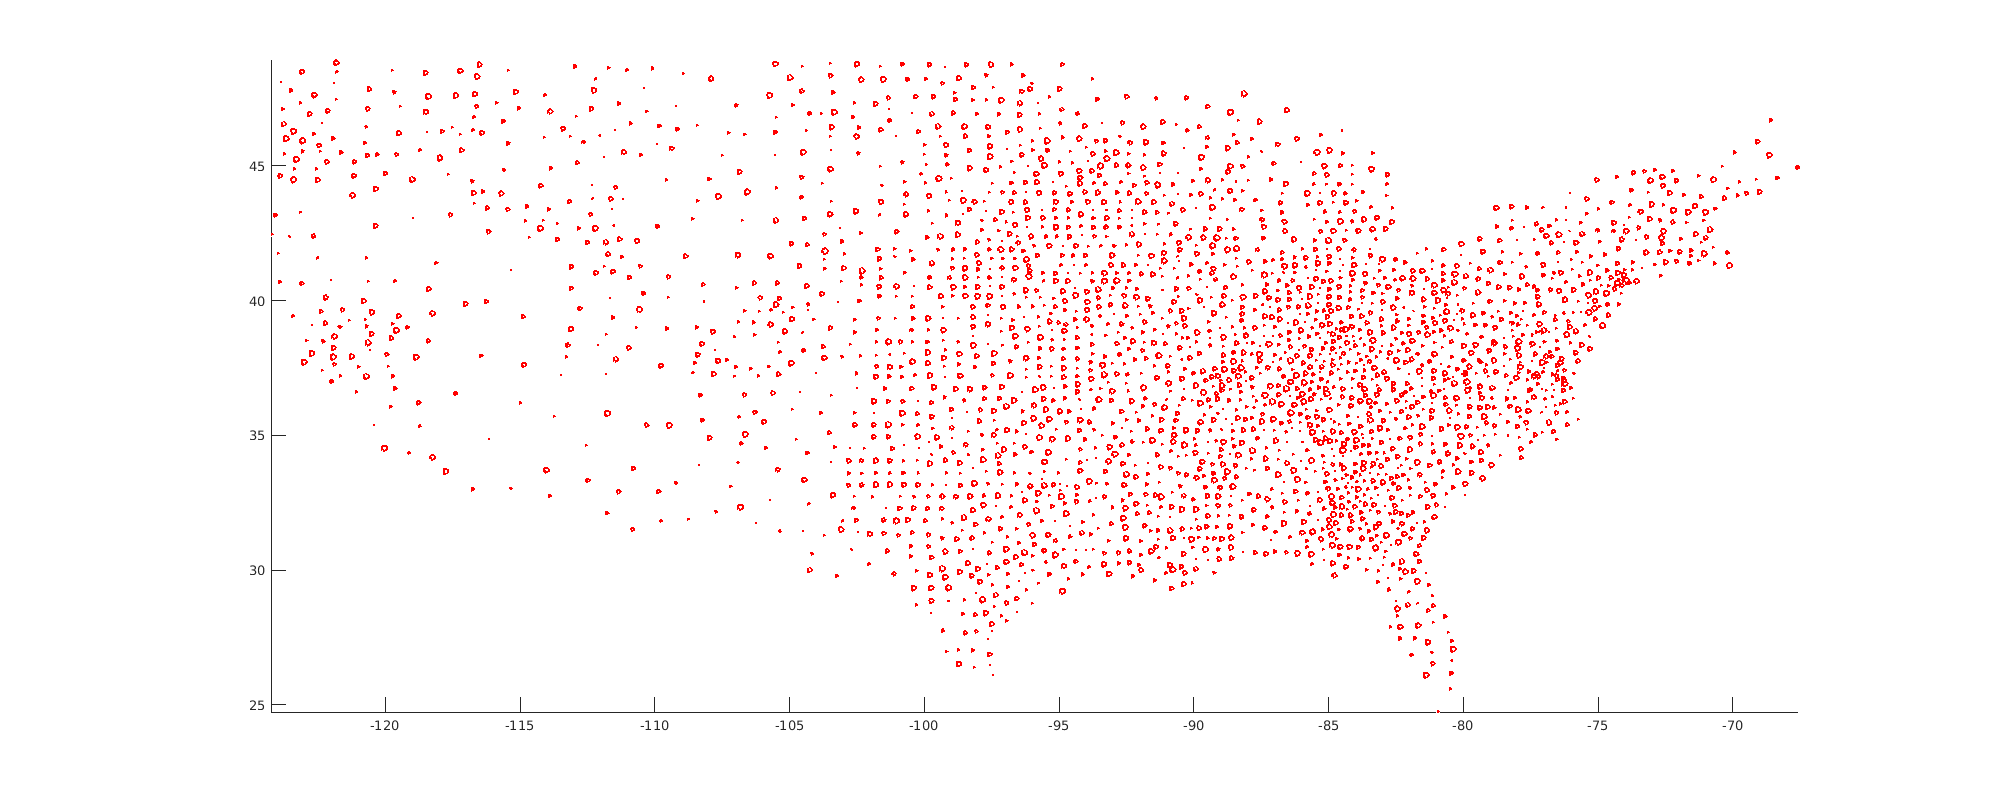

In [313]:
%plot inline -s 2000,800

%Neat MATLAB built-in function:
hold off
viscircles([clong,clat],rand(numel(clong),1)*.1)
axis tight equal

h = 
  Patch with properties:

    FaceColor: 'flat'
    FaceAlpha: 1
    EdgeColor: [0 0 0]
    LineStyle: '-'
        Faces: [6107x3 double]
     Vertices: [3108x3 double]

  Use GET to show all properties


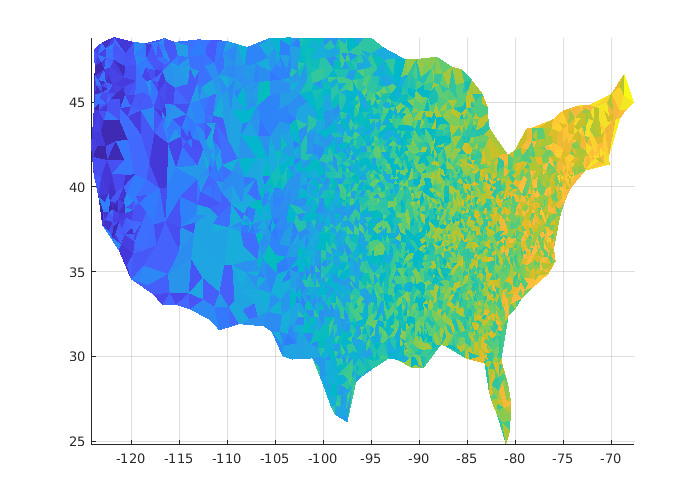

In [358]:
%plot inline
dt = delaunayTriangulation(clong,clat);
tri = dt.ConnectivityList;

xy = [clong, clat];
maxEdge = 2.6;
edges = [tri(:,[1 2]);tri(:,[1 3]);tri(:,[2 3])];
tri(any(reshape(sqrt((xy(edges(:,1),1) - xy(edges(:,2),1)).^2 + (xy(edges(:,1),2) - xy(edges(:,2),2)).^2),[],3) > maxEdge,2),:) = [];

figure
h = trisurf(tri,clong,clat,rand(numel(clong),1)*20+clong)
set(h,'edgecolor','none')
%shading interp
view(2)
axis tight

# Time-series Data Example

Source data:  
https://github.com/nytimes/covid-19-data

Direct link:  
https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv

In [341]:
% Read-in data file
T=readtable("us-states.csv");
% Format contents how we want
cases = table2array(T(:,4));

date = table2array(T(:,1));
elapsed = days(date - date(1));

states = table2array(T(:,2));
unique_states = unique(states);
mymap = containers.Map(unique_states,1:55);
state_nums=cell2mat(mymap.values(states));

% Pre-allocate "infection" and "day" matrices
infection = zeros(numel(unique_states), elapsed(end)+1);
day = infection;
% Pre-allocate "state_counter" to be 1 for all states
state_counter = ones(1,numel(unique_states));
% Loop through formatted data
for record = 1:numel(cases)
%    For next record, get correct row=state and column=state_counter(state)
    row = state_nums(record);
    column = state_counter(row);
    state_counter(row) = state_counter(row) + 1;
%    Put # infections in infection(row,column)
    infection(row,column) = cases(record);
    day(row,column) = elapsed(record);
%    Put day in day(row,column)   
end
% Find first day where infection>100, use this as starting day in plot
% Plot data for all states, starting from selected day

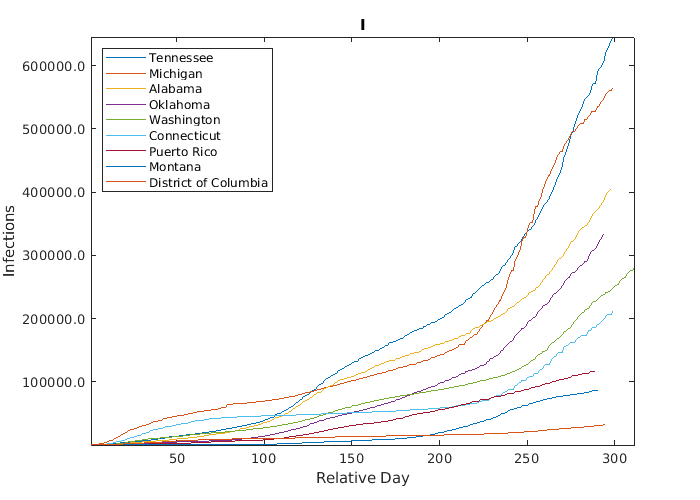

In [357]:
%plot inline -s 700,500
[vals,inds] = sort(max(infection'));
inds=inds(10000<vals & vals<700000);
for i = numel(inds):-5:1
    want = infection(inds(i),:)>100;
    h = plot(infection(inds(i), want));
    hold on
end

title("I")
xlabel('Relative Day')
ylabel('Infections')
legend(unique_states(inds(numel(inds):-5:1)),'Location','northwest')
ax = ancestor(h,'axes');
ax.YAxis.Exponent=0;
ytickformat('%2.1f')
axis tight